In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
cs_file = '../data/Mass_balance.tab'
dfmb = pd.read_csv(cs_file, delimiter='\t')
dfmb.rename(columns = {'Event':'Stake', 'Date/Time':'Date', 
                      'Elevation [m]':'Elevation', 'Diff':'SMB'}, inplace=True)
dfmb['Date'] = pd.to_datetime(dfmb['Date'])

In [3]:
labels = dfmb.drop_duplicates(subset=['Stake'])
len(labels)

19

In [4]:
smb_four = []
for i in labels['Stake']:
    subset = dfmb.loc[lambda df: df['Stake'] == i, :]
    date_2 = []
    date_2.append(subset.Date[subset.index[0]])
    for j in subset.Date[0:-1]:
        date_2.append(j)
    subset['Date1'] = date_2
    subset['Days'] = (subset['Date'] - subset['Date1']).dt.days
    subset = subset[['Stake', 'Date', 'Date1','Latitude', 'Longitude', 
                     'Elevation', 'Days', 'SMB']]
    smb_four.append(subset)

In [5]:
smb_four_df = pd.concat(smb_four, ignore_index=True)
smb_four_df

,Stake,Date,Date1,Latitude,Longitude,Elevation,Days,SMB
0,PG01,2011-03-02,2011-03-02,-62.201488,-58.583236,435.7,0,3.14
1,PG01,2011-03-07,2011-03-02,-62.201488,-58.583236,435.7,5,-3.03
2,PG01,2011-03-09,2011-03-07,-62.201488,-58.583236,435.7,2,0.10
3,PG01,2013-02-11,2011-03-09,-62.201488,-58.583236,435.7,705,0.05
4,PG01,2013-02-19,2013-02-11,-62.201488,-58.583236,435.7,8,-0.08
...,...,...,...,...,...,...,...,...
1307,PG19,2016-02-17,2016-01-04,-62.237672,-58.633624,96.8,44,-0.43
1308,PG19,2016-02-25,2016-02-17,-62.237672,-58.633624,96.8,8,-0.20
1309,PG19,2016-03-10,2016-02-25,-62.237672,-58.633624,96.8,14,-0.45
1310,PG19,2016-04-08,2016-03-10,-62.237672,-58.633624,96.8,29,-0.48


In [6]:
smb_four_df.to_csv('../data/SMB_fourc.csv', index=False, sep='\t')

In [7]:
cs_file = '../data/SMB_fourc.csv'
dfmb = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')
labels = dfmb.drop_duplicates(subset=['Stake'])

In [8]:
len(labels)

19

           Stake       Date1   Latitude  Longitude  Elevation  Days   SMB
Date                                                                     
2010-11-22  PG04  2010-11-22 -62.222118 -58.592014      294.3     0  1.75
2010-12-05  PG04  2010-11-22 -62.222118 -58.592014      294.3    13  0.43
2010-12-23  PG04  2010-12-05 -62.222118 -58.592014      294.3    18  0.01
2011-01-09  PG04  2010-12-23 -62.222118 -58.592014      294.3    17 -0.43
2011-01-25  PG04  2011-01-09 -62.222118 -58.592014      294.3    16  0.22
2011-03-04  PG04  2011-01-25 -62.222118 -58.592014      294.3    38 -1.21
2012-01-24  PG04  2011-03-04 -62.222118 -58.592014      294.3   326  0.89
2012-01-27  PG04  2012-01-24 -62.222118 -58.592014      294.3     3 -0.04
2013-02-11  PG04  2012-01-27 -62.222118 -58.592014      294.3   381 -0.21
2013-02-19  PG04  2013-02-11 -62.222118 -58.592014      294.3     8 -0.08
2013-02-27  PG04  2013-02-19 -62.222118 -58.592014      294.3     8  0.03
2013-03-06  PG04  2013-02-27 -62.22211

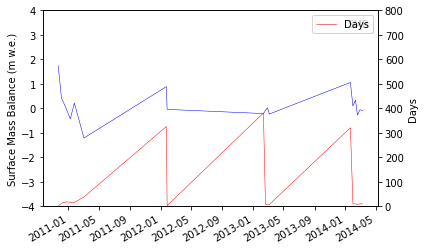

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
ax2 = ax1.twinx()

for i in labels['Stake'][3:4]:
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    print(stake)
    ax1.plot(stake['SMB'], 'b-', linewidth=0.5)
    ax2.plot(stake['Days'], 'r-', linewidth=0.5)
ax1.legend(['SMB'], loc='best')
ax1.set_ylabel(u'Surface Mass Balance (m w.e.)')
ax1.set_ylim(-4, 4)

ax2.legend(['Days'], loc='best')
ax2.set_ylabel('Days')
ax2.set_ylim(0, 800)
fig.autofmt_xdate()
fig.savefig('../fig/data_stakes_fourc.png',dpi = 150, bbox_inches = 'tight', 
             pad_inches = 0.1, facecolor='w')

In [ ]:
stake_sel = []
fig, (ax0) = plt.subplots(figsize=(6,4)) 
for i in labels['Event'].values:
    stake = dfmb.loc[lambda df: df['Event'] == i, :].loc['2011-10-01':'2015-10-31']
    if len(stake) > 5:
        ax0.plot(stake['Diff'].cumsum(),linewidth=0.5, label = i)
        stake_sel.append(stake)
ax0.set_xlabel('')
ax0.set_ylabel('Cumulative Mass Balance (m w.e.)')
ax0.set_ylim(-6, 6)
ax0.set_xlim(pd.Timestamp('2011-10-01'), pd.Timestamp('2016-05-31'))
plt.axhline(0, linewidth=1, color='grey', linestyle =':')
plt.xticks(rotation=90)
ax0.legend(loc='best',ncol=4, frameon=False)
fig.savefig('fig/SMB_sel_2011_2015_new.png',dpi = 200, bbox_inches = 'tight', 
             pad_inches = 0.1, facecolor='w')

In [ ]:
stake_sel = pd.concat(stake_sel)

In [ ]:
stake_sel.to_csv('../data/loc_stakes_SMB_2011_2015_new.csv', index=True, sep='\t')

In [ ]:
df = stake_sel.drop_duplicates(subset=['Event'])
df.to_csv('../data/loc_stakes_metadate_new.csv', index=False, sep='\t')